# Question 3: Unsupervised Learning
## 90-803 Machine Learning Foundations with Python (Spring 2024)
### Team 17: Yoko, Tessa, Hannah

This notebook attempts to explore question #3 of our project. <br><br>
**Question #3:** Are there any hidden structures or associations between housing prices and climate indicators that is worth exploring?<br>
*Target Variable:* None<br>
*Task:* Unsupervised learning to uncover hidden patterns in the dataset that are valuable for classification/grouping.

## Importing the Relevant Libraries

In [1]:
# common libraries
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# scalers
from sklearn.preprocessing import StandardScaler

# metrics
from sklearn.metrics import silhouette_score

# unsupervised learning (clustering) libraries
from sklearn.cluster import AgglomerativeClustering, KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import scipy as sp
from scipy.cluster.hierarchy import linkage,dendrogram

# PCA libraries
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV 
from yellowbrick.features import PCA as PCA_viz


## Initial Exploration
We will first explore the dataset and pick the appropriate columns for unsurpervised learning.

In [15]:
# read in the dataset
data = pd.read_csv("all_data_geo.csv", index_col=0)
data.head()

,Year,Month,RegionName,State,Bottom-Tier Average Home Value Estimate,Top-Tier Average Home Value Estimate,Average Temperature Value,Anomaly (1901-2000 base period),1901-2000 Mean,Initial Fees and Charges (%),Effective Rate (%),Term to Maturity,Loan Amount ($thou),Purchase Price ($thou),Loan-to-Price Ratio (%),Share of Total Market (%),ALAND,AWATER,INTPTLAT,INTPTLON
0,2000,1,Los Angeles County,CA,122826.545216,400192.738911,52.3,4.5,47.8,0.93,8.01,15,103.0,173.6,64.7,7.0,10515988166,1785003207,34.196398,-118.261862
1,2000,1,Los Angeles County,CA,122826.545216,400192.738911,52.3,4.5,47.8,0.81,8.20,30,129.9,166.8,81.1,61.1,10515988166,1785003207,34.196398,-118.261862
2,2000,1,Cook County,IL,71689.188026,302264.545103,24.9,2.4,22.5,0.93,8.01,15,103.0,173.6,64.7,7.0,2447342616,1786339408,41.894294,-87.645455
3,2000,1,Cook County,IL,71689.188026,302264.545103,24.9,2.4,22.5,0.81,8.20,30,129.9,166.8,81.1,61.1,2447342616,1786339408,41.894294,-87.645455
4,2000,1,Harris County,TX,61195.175569,217850.462915,57.4,5.6,51.8,0.93,8.01,15,103.0,173.6,64.7,7.0,4421145870,182187806,29.857273,-95.393037


In [16]:
# we can only do unsupervised learning on certain columns so we need to get the numeric columns we need out and changed "value" to "temperature for more clarity"
unsupervised = data[data.columns.difference(['State', 'RegionName'])]
unsupervised.head(5)

,1901-2000 Mean,ALAND,AWATER,Anomaly (1901-2000 base period),Average Temperature Value,Bottom-Tier Average Home Value Estimate,Effective Rate (%),INTPTLAT,INTPTLON,Initial Fees and Charges (%),Loan Amount ($thou),Loan-to-Price Ratio (%),Month,Purchase Price ($thou),Share of Total Market (%),Term to Maturity,Top-Tier Average Home Value Estimate,Year
0,47.8,10515988166,1785003207,4.5,52.3,122826.545216,8.01,34.196398,-118.261862,0.93,103.0,64.7,1,173.6,7.0,15,400192.738911,2000
1,47.8,10515988166,1785003207,4.5,52.3,122826.545216,8.20,34.196398,-118.261862,0.81,129.9,81.1,1,166.8,61.1,30,400192.738911,2000
2,22.5,2447342616,1786339408,2.4,24.9,71689.188026,8.01,41.894294,-87.645455,0.93,103.0,64.7,1,173.6,7.0,15,302264.545103,2000
3,22.5,2447342616,1786339408,2.4,24.9,71689.188026,8.20,41.894294,-87.645455,0.81,129.9,81.1,1,166.8,61.1,30,302264.545103,2000
4,51.8,4421145870,182187806,5.6,57.4,61195.175569,8.01,29.857273,-95.393037,0.93,103.0,64.7,1,173.6,7.0,15,217850.462915,2000


In [17]:
# double check NaN values one more time
unsupervised.isnull().sum()

1901-2000 Mean                             0
ALAND                                      0
AWATER                                     0
Anomaly (1901-2000 base period)            0
Average Temperature Value                  0
Bottom-Tier Average Home Value Estimate    0
Effective Rate (%)                         0
INTPTLAT                                   0
INTPTLON                                   0
Initial Fees and Charges (%)               0
Loan Amount ($thou)                        0
Loan-to-Price Ratio (%)                    0
Month                                      0
Purchase Price ($thou)                     0
Share of Total Market (%)                  0
Term to Maturity                           0
Top-Tier Average Home Value Estimate       0
Year                                       0
dtype: int64

In [18]:
# shape of the dataset
unsupervised.shape

(579894, 18)

In [19]:
# any scaling necessary? (of course, the answer is yes)
unsupervised.describe()

,1901-2000 Mean,ALAND,AWATER,Anomaly (1901-2000 base period),Average Temperature Value,Bottom-Tier Average Home Value Estimate,Effective Rate (%),INTPTLAT,INTPTLON,Initial Fees and Charges (%),Loan Amount ($thou),Loan-to-Price Ratio (%),Month,Purchase Price ($thou),Share of Total Market (%),Term to Maturity,Top-Tier Average Home Value Estimate,Year
count,579894.000000,5.798940e+05,5.798940e+05,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,5.798940e+05,579894.000000
mean,54.317547,2.338742e+09,1.819740e+08,1.385632,55.702485,94103.848741,4.955709,37.986718,-89.613755,0.891515,177.251586,72.512364,6.434317,260.126543,37.364843,22.500000,2.851340e+05,2010.712761
std,17.099949,3.703393e+09,5.523955e+08,3.388082,17.135498,64177.827177,1.232351,4.615860,12.635366,0.365064,36.994047,8.549974,3.466285,36.813915,29.181675,7.500006,2.108634e+05,5.361191
min,1.800000,5.868388e+07,9.251200e+04,-22.200000,-5.200000,6109.396309,2.890000,25.586120,-124.210929,0.180000,60.300000,42.300000,1.000000,124.000000,1.300000,15.000000,5.947229e+04,2000.000000
25%,41.300000,1.055922e+09,1.047176e+07,-0.700000,42.800000,52879.469613,3.980000,34.763109,-94.888456,0.540000,150.900000,67.100000,3.000000,237.700000,7.700000,15.000000,1.884248e+05,2007.000000
50%,55.500000,1.479110e+09,2.694270e+07,1.300000,57.200000,77205.031646,4.650000,38.423084,-86.034263,0.910000,179.800000,74.800000,6.000000,262.500000,32.450000,22.500000,2.347503e+05,2011.000000
75%,68.800000,2.206699e+09,8.116171e+07,3.400000,70.000000,115764.095664,5.960000,41.355319,-81.400955,1.220000,204.400000,80.300000,9.000000,286.100000,65.500000,30.000000,3.139183e+05,2015.000000
max,91.700000,5.197631e+10,1.405367e+10,19.800000,96.200000,915009.312632,8.550000,48.842653,-68.666616,1.510000,254.800000,83.500000,12.000000,347.300000,82.900000,30.000000,5.178158e+06,2019.000000


In [20]:
# It also seems Term to Maturity is actually categorical, along with Month and Year
unsupervised['Term to Maturity'].unique()

array([15, 30], dtype=int64)

Initial exploration shows that we must (1) drop categorical values and (2) scale our dataset. Many clustering methods do not work well with mixed data, and we have mostly numerical data. Dropping the categorical values will help the algorithms, but we should keep in mind that the clustering we uncovered might be heavily influenced by the dropped categorical values. Scaling the dataset helps clustering methods, especially those that rely on the distance between data points as well as PCA.

## Getting the right dataset for clustering
These steps include dropping categorical features and scaling the data. We will use standard scaler because PCA relys on zero-centered input.


In [22]:
#dropping year, month, and term to maturity (categorical) 
cols = ['Month', 'Year', 'Term to Maturity']
unsupervised = unsupervised.drop(columns=cols)

In [68]:
#initalize a scaler
scaler = StandardScaler()

#scale the data
scaled_features = scaler.fit_transform(unsupervised)

# getting a scaled dataframe
X = pd.DataFrame(scaled_features, columns = unsupervised.columns)

#check out the first few rows
X.head()

,1901-2000 Mean,ALAND,AWATER,Anomaly (1901-2000 base period),Average Temperature Value,Bottom-Tier Average Home Value Estimate,Effective Rate (%),INTPTLAT,INTPTLON,Initial Fees and Charges (%),Loan Amount ($thou),Loan-to-Price Ratio (%),Month,Purchase Price ($thou),Share of Total Market (%),Term to Maturity,Top-Tier Average Home Value Estimate,Year
0,-0.387519,2.222181,2.651244,1.676830,-0.020897,3.231273,-2.044766,-0.808756,-2.293041,-0.366732,-1.012019,-0.894948,-1.593226,0.799291,-0.968770,-1.0,2.731642,0.0
1,-0.387519,2.222181,2.651244,1.676830,-0.020897,3.231273,-0.804943,-0.808756,-2.293041,0.818412,0.939012,1.067861,-1.593226,-0.343167,1.085383,1.0,2.731642,0.0
2,-1.851978,0.014615,2.653435,-0.101969,-1.789072,0.071879,-2.044766,0.838527,0.230026,-0.366732,-1.012019,-0.894948,-1.593226,0.799291,-0.968770,-1.0,0.413033,0.0
3,-1.851978,0.014615,2.653435,-0.101969,-1.789072,0.071879,-0.804943,0.838527,0.230026,0.818412,0.939012,1.067861,-1.593226,-0.343167,1.085383,1.0,0.413033,0.0
4,-0.155984,0.554644,0.023361,-1.349783,-0.429787,0.061762,-2.044766,-1.737292,-0.408445,-0.366732,-1.012019,-0.894948,-1.593226,0.799291,-0.968770,-1.0,0.067643,0.0


In [53]:
#double check the amount of data we have
X.shape

(40852, 18)

## PCA
Because we have a lot of data and features, many of which are correlated with one another (Average Temperature and Temperature 1901-200 Mean Temperature), we should do PCA. 


In [69]:
#initialize PCA
pca = PCA()

#get the PC dataframe
unsupervised_pca = pd.DataFrame(pca.fit_transform(X), columns=['V'+str(i) for i in range(1,X.shape[1]+1)], index=X.index)
unsupervised_pca

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
0,-2.617238,1.994634,4.862380,2.356763,0.020337,-0.810170,1.943545,1.261554,1.439644,-1.191139,0.603629,-0.262421,0.057347,0.136189,0.058086,-0.003010,-2.311378e-05,-0.0
1,1.160390,2.040392,4.728369,3.628694,0.124118,0.079155,1.895639,0.420972,1.001524,-0.488372,-0.757181,-0.303758,0.426694,-0.002752,-0.049972,0.000609,-2.789221e-05,0.0
2,-2.678571,3.069140,-0.380885,0.223829,-1.034461,0.148919,2.467629,0.030949,0.887492,-0.788356,0.631766,0.240034,0.000871,0.167644,0.063930,-0.010202,8.731044e-07,0.0
3,1.099057,3.114897,-0.514896,1.495760,-0.930679,1.038243,2.419723,-0.809632,0.449371,-0.085589,-0.729044,0.198696,0.370218,0.028704,-0.044128,-0.006583,-3.905332e-06,0.0
4,-2.598073,0.631875,-0.405881,0.814356,0.600887,0.931646,0.234186,2.462074,0.713237,-0.627838,0.717258,-0.068668,0.106545,0.162552,0.078689,-0.009111,5.904134e-06,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40847,2.356221,1.702361,0.153928,-1.351906,0.047974,-0.544874,-0.378903,-0.363606,-0.683074,0.128434,-1.896725,0.387055,-0.071911,0.015244,0.060658,-0.004141,-2.425844e-05,-0.0
40848,-1.851959,2.261627,0.102771,-1.913565,1.020894,-2.068846,-0.034143,0.302175,-0.846078,0.330991,-0.595183,0.798114,-0.005653,0.066145,-0.000094,-0.010918,-3.036748e-05,0.0
40849,2.346490,1.981324,0.189823,-1.407141,1.164251,-0.802957,-0.044229,-0.697900,-0.444914,0.514274,-1.744379,0.768712,-0.062806,0.011022,0.059834,-0.003238,-2.902405e-05,-0.0
40850,-1.856223,2.842581,0.449635,-2.194814,0.946812,-1.548658,-0.247881,0.430524,-1.597579,-0.444382,-0.768378,0.267026,-0.016090,0.075644,0.003038,-0.013023,-1.786190e-05,0.0


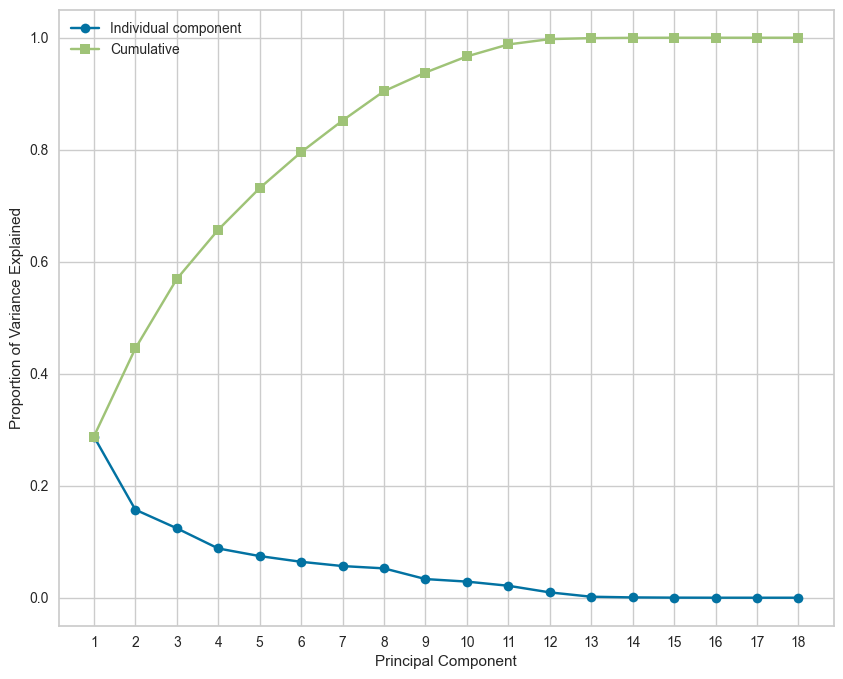

In [55]:
#graphing the cummulative explained variance plot
plt.figure(figsize=(10,8))

#create range of x ticks labels
feats = np.arange(len(pca.explained_variance_ratio_)) + 1

#plotting the lines
plt.plot(feats, pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(feats, np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

#annotating the graph
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xticks(feats)
plt.legend(loc=2)

#showing the graph
plt.show();

In [70]:
pca = PCA(n_components=11)

#We fit and transform X to get the principal components from PCA
X_pca = pd.DataFrame(pca.fit_transform(X), 
                 columns=['PC'+str(i) for i in range(1,12)])
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-2.617238,1.994634,4.862380,2.356763,0.020337,-0.810170,1.943545,1.261554,1.439644,-1.191139,0.603629
1,1.160390,2.040392,4.728369,3.628694,0.124118,0.079155,1.895639,0.420972,1.001524,-0.488372,-0.757181
2,-2.678571,3.069140,-0.380885,0.223829,-1.034461,0.148919,2.467629,0.030949,0.887492,-0.788356,0.631766
3,1.099057,3.114897,-0.514896,1.495760,-0.930679,1.038243,2.419723,-0.809632,0.449371,-0.085589,-0.729044
4,-2.598073,0.631875,-0.405881,0.814356,0.600887,0.931646,0.234186,2.462074,0.713237,-0.627838,0.717258
...,...,...,...,...,...,...,...,...,...,...,...
40847,2.356221,1.702361,0.153928,-1.351906,0.047974,-0.544874,-0.378903,-0.363606,-0.683074,0.128434,-1.896725
40848,-1.851959,2.261627,0.102771,-1.913565,1.020894,-2.068846,-0.034143,0.302175,-0.846078,0.330991,-0.595183
40849,2.346490,1.981324,0.189823,-1.407141,1.164251,-0.802957,-0.044229,-0.697900,-0.444914,0.514274,-1.744379
40850,-1.856223,2.842581,0.449635,-2.194814,0.946812,-1.548658,-0.247881,0.430524,-1.597579,-0.444382,-0.768378


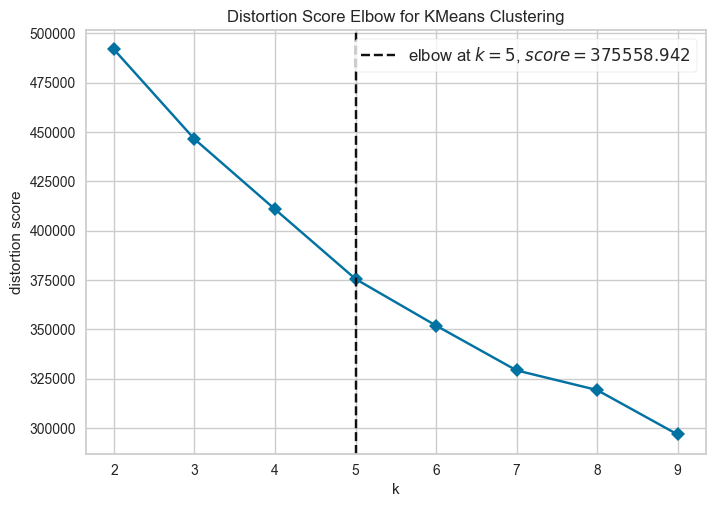

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), timings = False)
visualizer.fit(X_pca)
visualizer.show()

In [60]:
X['kmeans_label_pca'] = KMeans(5, random_state=1).fit(X_pca).labels_
X

,1901-2000 Mean,ALAND,AWATER,Anomaly (1901-2000 base period),Average Temperature Value,Bottom-Tier Average Home Value Estimate,Effective Rate (%),INTPTLAT,INTPTLON,Initial Fees and Charges (%),Loan Amount ($thou),Loan-to-Price Ratio (%),Month,Purchase Price ($thou),Share of Total Market (%),Term to Maturity,Top-Tier Average Home Value Estimate,Year,kmeans_label_pca
0,-0.387519,2.222181,2.651244,1.676830,-0.020897,3.231273,-2.044766,-0.808756,-2.293041,-0.366732,-1.012019,-0.894948,-1.593226,0.799291,-0.968770,-1.0,2.731642,0.0,0
1,-0.387519,2.222181,2.651244,1.676830,-0.020897,3.231273,-0.804943,-0.808756,-2.293041,0.818412,0.939012,1.067861,-1.593226,-0.343167,1.085383,1.0,2.731642,0.0,0
2,-1.851978,0.014615,2.653435,-0.101969,-1.789072,0.071879,-2.044766,0.838527,0.230026,-0.366732,-1.012019,-0.894948,-1.593226,0.799291,-0.968770,-1.0,0.413033,0.0,2
3,-1.851978,0.014615,2.653435,-0.101969,-1.789072,0.071879,-0.804943,0.838527,0.230026,0.818412,0.939012,1.067861,-1.593226,-0.343167,1.085383,1.0,0.413033,0.0,1
4,-0.155984,0.554644,0.023361,-1.349783,-0.429787,0.061762,-2.044766,-1.737292,-0.408445,-0.366732,-1.012019,-0.894948,-1.593226,0.799291,-0.968770,-1.0,0.067643,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40847,-1.591501,-0.330317,-0.255945,-0.022321,-1.523845,-0.082649,1.645870,0.542106,-0.773530,0.141187,0.951572,0.927660,1.593084,-0.085554,0.982986,1.0,0.424462,0.0,1
40848,-1.730422,0.809539,-0.272613,0.136974,-1.623305,-0.667283,-0.026450,0.961866,-1.095664,-0.028120,-0.631023,-1.161329,1.593084,2.031355,-1.002903,-1.0,0.292631,0.0,2
40849,-1.730422,0.809539,-0.272613,0.136974,-1.623305,-0.667283,1.645870,0.961866,-1.095664,0.141187,0.951572,0.927660,1.593084,-0.085554,0.982986,1.0,0.292631,0.0,1
40850,-1.915650,0.106246,-0.256410,-0.447109,-1.921685,0.038988,-0.026450,1.182680,-2.005456,-0.028120,-0.631023,-1.161329,1.593084,2.031355,-1.002903,-1.0,0.155780,0.0,2


## Model #1: KMeans Clustering

We will attempt to do a KMeans clustering model, and get the clusters out from our scaled dataset. We will proceed with a random_state = 1 and n_init = 10.

### Train: Default KMeans Model
We will first train a KMeans model by default.

In [45]:
#Initialize a default Kmeans model
kmeans_default = KMeans(n_init=10, random_state=1)

#Train the Model
kmeans_default.fit(X)

#Get cluster predictions
y_pred_train_kmeans = kmeans_default.predict(X)

#Evaluate perfomance
silhouette_score_train_kmeans = silhouette_score(X, y_pred_train_kmeans)

#Print the performance
print('Silhouette score:', round(silhouette_score_train_kmeans, 3))

KeyboardInterrupt: 

>0.289 is not bad for a first attempt at such a mangled dataset. I was expecting a much worst result, so I will take 0.289 as a win for now.

### Tuning: Finding the Best K
We will now use three metrics: elbowvisualizer, calinski harabasz, and SilhouetteVisualizer to determine the best cluster number for our KMeans.

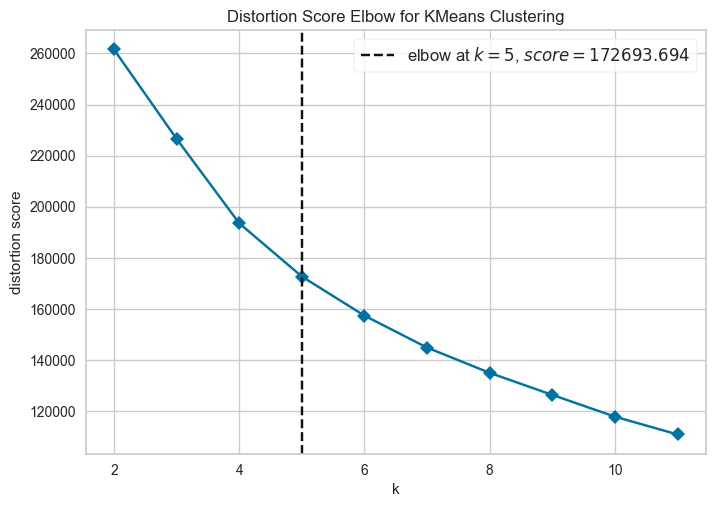

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
#KElbowVisualizer()

#initalizing the model and visualizer
model = KMeans(n_init=10, random_state=1)
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)

#fitting the data
visualizer.fit(X)

#plotting
visualizer.show()

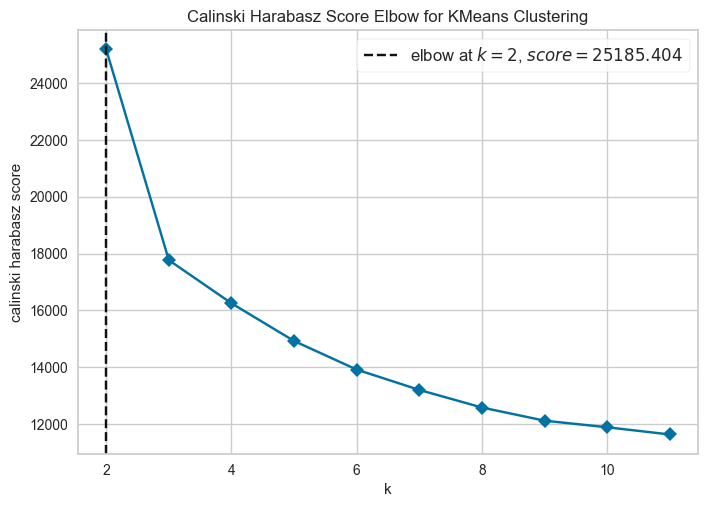

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [19]:
# Calinski Harabasz

#initalizing the model and visualizer
model = KMeans(n_init=10, random_state=1)
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', timings=False, locate_elbow=True)

#fitting the data
visualizer.fit(X)

#plotting
visualizer.show()

>From the two graphs, I will try both a k=5 and k=2 for my SilhouetteVisualizer().

In [62]:
X.columns

Index(['1901-2000 Mean', 'ALAND', 'AWATER', 'Anomaly (1901-2000 base period)',
       'Average Temperature Value', 'Bottom-Tier Average Home Value Estimate',
       'Effective Rate (%)', 'INTPTLAT', 'INTPTLON',
       'Initial Fees and Charges (%)', 'Loan Amount ($thou)',
       'Loan-to-Price Ratio (%)', 'Month', 'Purchase Price ($thou)',
       'Share of Total Market (%)', 'Term to Maturity',
       'Top-Tier Average Home Value Estimate', 'Year', 'kmeans_label_pca'],
      dtype='object')

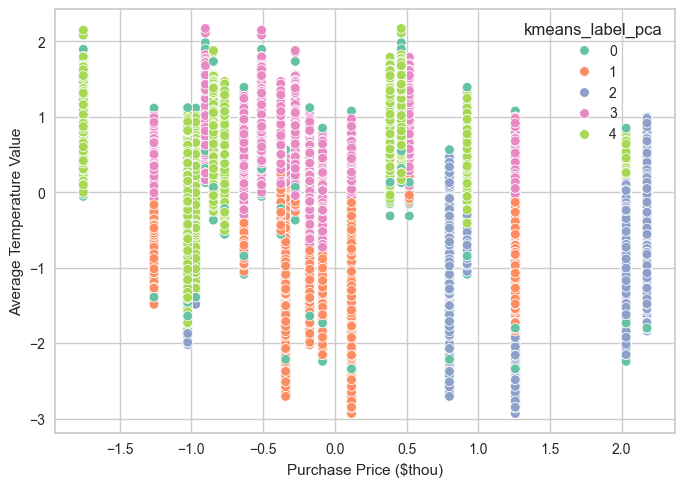

In [63]:
sns.scatterplot(data=X, x="Purchase Price ($thou)", y="Average Temperature Value", hue='kmeans_label_pca',palette="Set2")
plt.show();

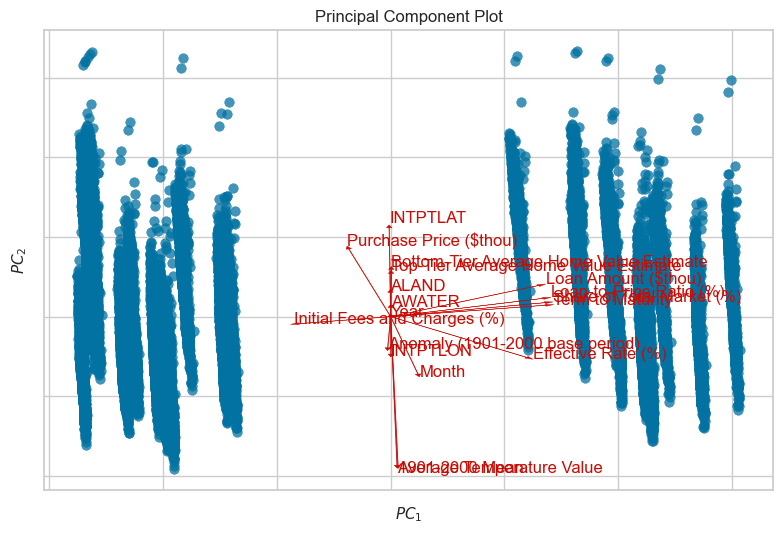

In [67]:
visualizer = PCA_viz(proj_features=True)
visualizer.fit_transform(X.drop(columns='kmeans_label_pca'))
visualizer.show();


In [46]:
# SilhouetteVisualizer with k = 2

#initalizing the model and visualizer
model = KMeans(2, n_init=10, random_state=1)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

#fitting the data
visualizer.fit(X) 

#showing the model
visualizer.show()

KeyboardInterrupt: 

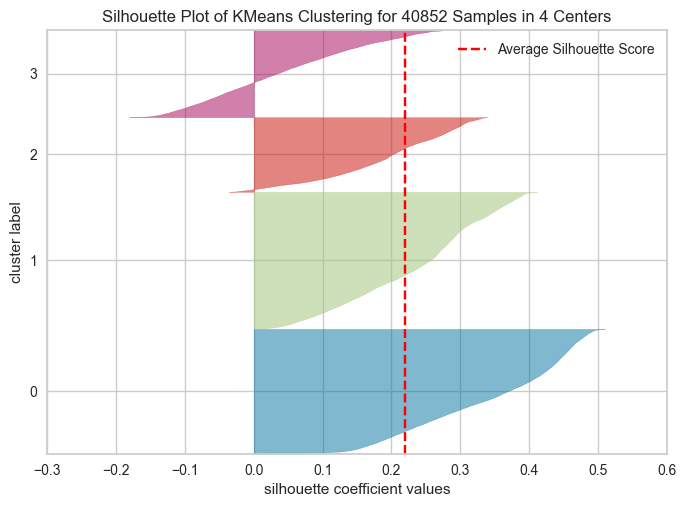

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 40852 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [72]:
# SilhouetteVisualizer with k = 5

#initalizing the model and visualizer
model = KMeans(4, n_init=10, random_state=1)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

#fitting the data
visualizer.fit(X_pca) 

#showing the model
visualizer.show()

The graphs show that with k = 2, our clusters are very accurate. We think the top-tier/bottom-tier values play a big role in dictating this pattern, but for now, it is still interesting to see!

### Best KMeans: Training the Final KMean Model
We finally have our best KMeans model with k = 2.

In [25]:
# final KMeans model

#Initialize a default Kmeans model
kmeans_best = KMeans(2, n_init=10, random_state=1)

#Train the Model
kmeans_best.fit(X)

#Get cluster predictions
y_pred_test_kmeans = kmeans_best.predict(X)

#Evaluate perfomance
silhouette_score_test_kmeans = silhouette_score(X, y_pred_test_kmeans)

#Print the performance
print('Silhouette score:', round(silhouette_score_test_kmeans, 3))

Silhouette score: 0.381


### Visualized the Clusters for KMeans
We will extract the labels and visualize the results.

In [26]:
# creating a results dataframe with labels
X_results = X.copy()

X_results["labels_kmeans"] = y_pred_test_kmeans
X_results.head()

,Anomaly (1901-2000 base period),Bottom-Tier Average Home Value Estimate,Effective Rate (%),Initial Fees and Charges (%),Loan Amount ($thou),Loan-to-Price Ratio (%),Purchase Price ($thou),Share of Total Market (%),Top-Tier Average Home Value Estimate,Average Temperature,labels_kmeans
0,1.674115,3.205215,-2.044766,-0.366734,-1.012017,-0.894948,0.799297,-0.968770,2.736073,-0.022143,0
1,1.674115,3.205215,-0.804943,0.818409,0.939012,1.067861,-0.343164,1.085383,2.736073,-0.022143,1
2,-0.105783,0.062613,-2.044766,-0.366734,-1.012017,-0.894948,0.799297,-0.968770,0.410806,-1.794874,0
3,-0.105783,0.062613,-0.804943,0.818409,0.939012,1.067861,-0.343164,1.085383,0.410806,-1.794874,1
4,-1.354369,0.052550,-2.044766,-0.366734,-1.012017,-0.894948,0.799297,-0.968770,0.064424,-0.432087,0


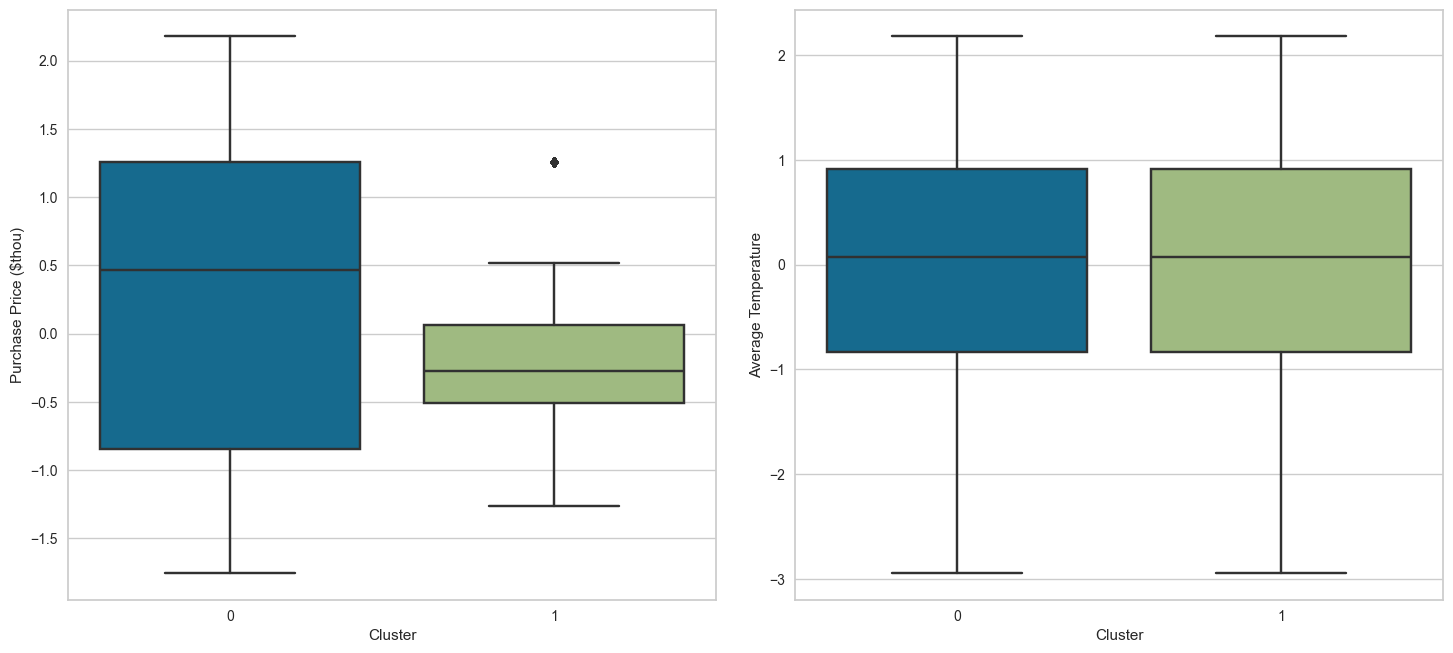

In [31]:
# visualize the clusters with purchase price and average temperature, two of our most interested features

#initalizing subplots
fig, ax = plt.subplots(1,2, figsize=(15,7))

#selecting interested features
cols = ['Purchase Price ($thou)','Average Temperature']

#plotting
for i in range(2):
    sns.boxplot(ax = ax[i], data= X_results, y = cols[i], x = 'labels_kmeans').set(xlabel = 'Cluster')

#showing the plot
plt.tight_layout(pad=2)
plt.show()

**Conclusions:** The KMeans model suggest that there are two natural clusters for our data. In 2018, average temperature is quite evenly distributed amongst the two clusters, but purchase price is condensed in one cluster more than the other. There are definitely patterns in our data that is worth exploring more.

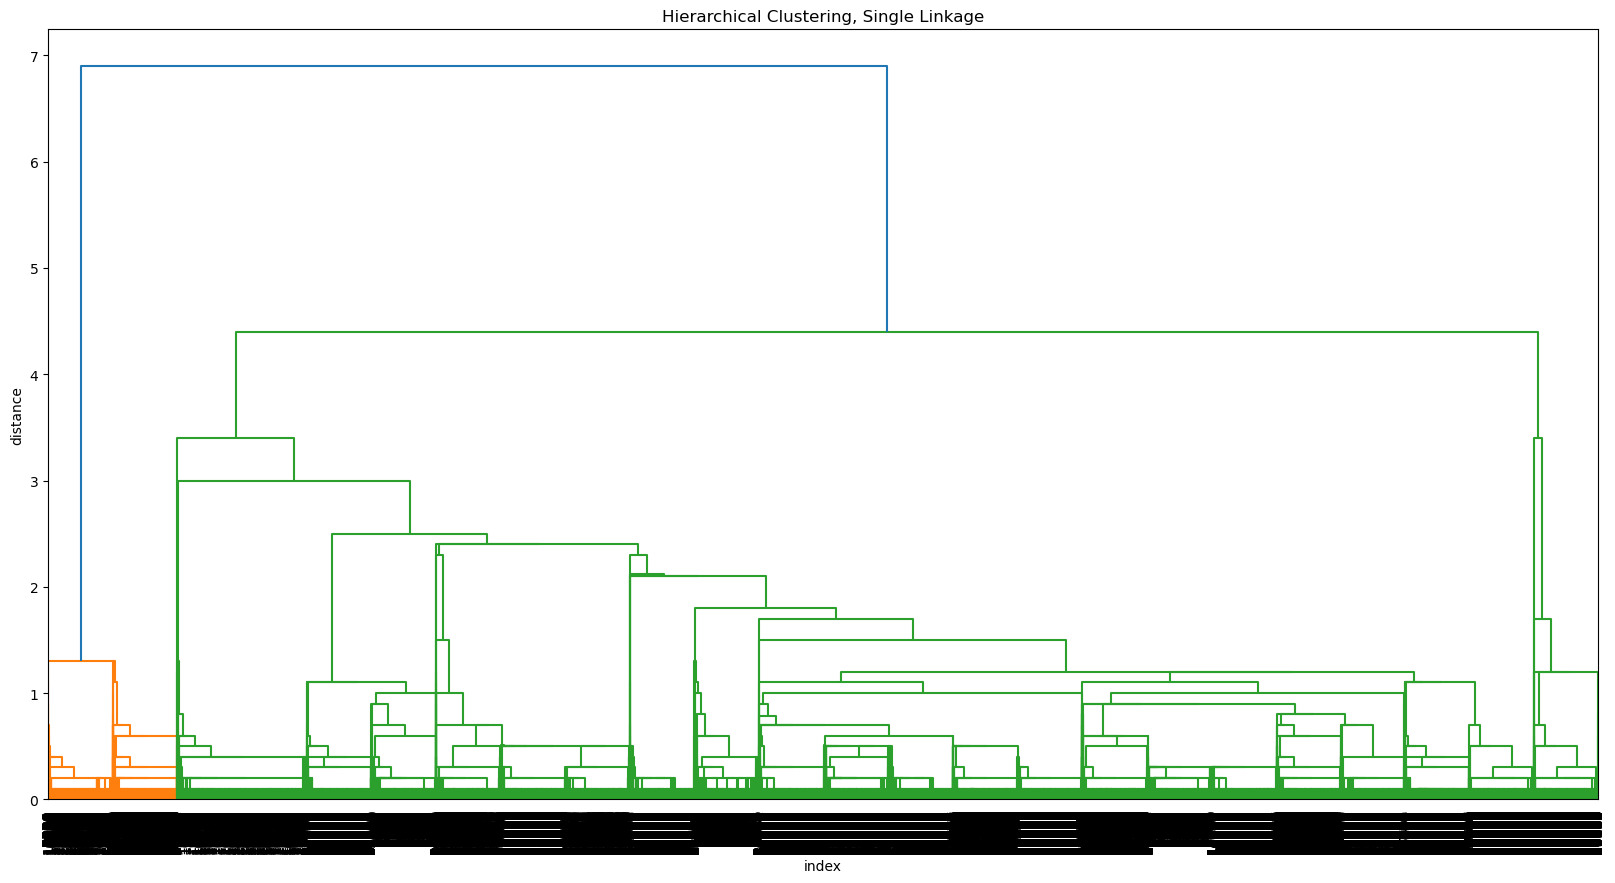

In [11]:
#The code below is reserved for sprint 5 (another model). Do not include in sprint 4 grading.

# plotting the dendogram

# style = ['single', 'average', 'complete', 'ward']

# for i in 
# avgl = linkage(X, i)
# plt.figure(figsize=(20,10))
# plt.grid(False)
# plt.title("Hierarchical Clustering, Single Linkage")
# plt.xlabel("index")
# plt.ylabel("distance")
# dendrogram(avgl,leaf_font_size=10);

## References:
1. Lab 9 codes
2. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
3. In-class exercises for KMeans